<a href="https://colab.research.google.com/github/masa512/audio_preprocess/blob/main/audio_preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchaudio
import torchvision.transforms
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio




# Preprocess

We will cover the following steps

1. Audio Loading
2. Audio Visualization + STFT Visualization for multichannel
3. Apply effects
4. MFCC
5. Create custom torch dataset with transformation
6. Finish dataloader 

## Load audio and Visualization

In [ ]:
# Load the dataset

ds = torchaudio.datasets.YESNO(root = '.',download = True)

  0%|          | 0.00/4.49M [00:00<?, ?B/s]

In [ ]:
# Sample audio example 
waveform1, sr1, label1 = ds[0]

torch.Size([1, 50800])

In [ ]:
# Plotting function for channels

def plot_channels(waveform,sr,title = 'Untitled'):

  num_channels, num_frames = waveform.shape
  time_axis = 1/(sr)*np.arange(num_frames)
  fig, axes = plt.subplots(num_channels,1)
  if num_channels == 1:
    # For this case, axes will by default be an int
    axes = [axes]

  for i in range(len(axes)):
    axes[i].plot(time_axis,waveform[i,:])
    axes[i].set_ylabel('intensity')
    axes[i].set_xlabel('time (s)')
  
  fig.suptitle(title)
  
# Plotting function for channels in Freq domain (STFT)

def plot_STFT(waveform,N_fft,sr,title = 'Untitled STFT'):

  num_channels,num_frames = waveform.shape
  fig, axes = plt.subplots(num_channels,1)
  if num_channels == 1:
    axes = [axes]
  
  for i in range(len(axes)):
    axes[i].specgram(waveform[i,:],Fs = sr, NFFT = N_fft)
    axes[i].set_ylabel(f'Channel {i}')
  
  fig.suptitle(title)
  


[0, 0, 0, 0, 1, 1, 1, 1]


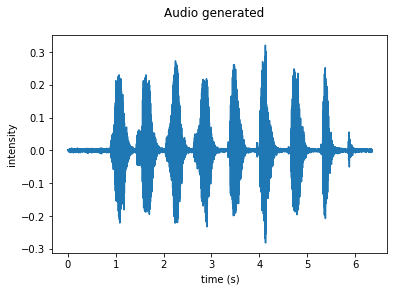

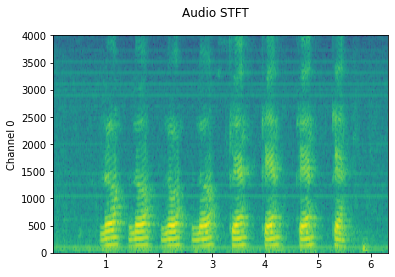

In [ ]:
plot_channels(waveform1,sr1,'Audio generated')
plot_STFT(waveform1,256,sr1,title = 'Audio STFT')
print(label1)
Audio(waveform1, rate=sr1)


##Apply Effects

Here we will use the torchaudio.sox_effects library to apply interesting effects over the data



In [ ]:
# We list different effects available here

print(torchaudio.sox_effects.effect_names())

['allpass', 'band', 'bandpass', 'bandreject', 'bass', 'bend', 'biquad', 'chorus', 'channels', 'compand', 'contrast', 'dcshift', 'deemph', 'delay', 'dither', 'divide', 'downsample', 'earwax', 'echo', 'echos', 'equalizer', 'fade', 'fir', 'firfit', 'flanger', 'gain', 'highpass', 'hilbert', 'loudness', 'lowpass', 'mcompand', 'norm', 'oops', 'overdrive', 'pad', 'phaser', 'pitch', 'rate', 'remix', 'repeat', 'reverb', 'reverse', 'riaa', 'silence', 'sinc', 'speed', 'stat', 'stats', 'stretch', 'swap', 'synth', 'tempo', 'treble', 'tremolo', 'trim', 'upsample', 'vad', 'vol']


In [ ]:
# Then we can apply some overdrive and phaser and result is saved in waveform2

effects = [["overdrive","20","50"],
           ["phaser"]
           ]

waveform2,sr2 = torchaudio.sox_effects.apply_effects_tensor(waveform1,sr1,effects)

[0, 0, 0, 0, 1, 1, 1, 1]


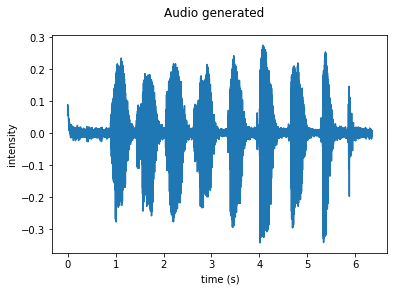

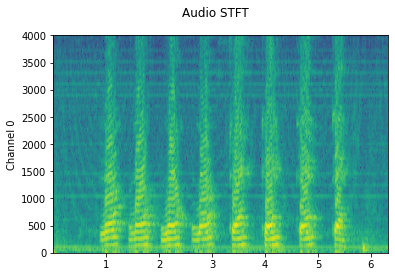

In [ ]:
# Visualize the output here

plot_channels(waveform2,sr2,'Audio generated')
plot_STFT(waveform2,256,sr2,title = 'Audio STFT')
print(label1)
Audio(waveform2, rate=sr2)